# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

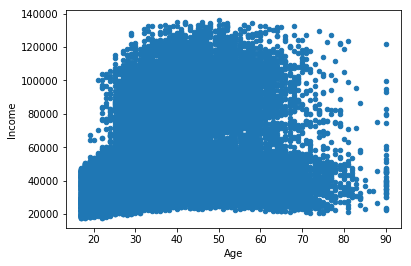

In [14]:
income.plot(x='Age', y='Income', kind='scatter')

In [82]:
#Preguntas 4,1

#1.¿Cuál es la correlación de las variables ingreso y edad?
#Dado que el coeficiente de correlación es positivo, se puede decir que a medida que aumenta la edad aumenta el ingreso de una 
#persona.

income['Income'].corr(income['Age'])

0.2904082980024351

In [81]:
#2. Ante un incremento de 1% en la edad cómo aumenta el ingreso?

#Dado que la edad está en niveles es necesario utilizar el logaritmo de la edad para estimar un efecto de un incremento
#de 1% en la edad sobre el ingreso

ln_edad=np.log(np.array(income[['Age']]))
linlog_model=LinearRegression()
linlog_model.fit(ln_edad, income['Income']).coef_/100

#Así un incremento de 1% en la edad genera un incremento de 238,6 dolares en el ingreso.

array([238.67167594])

In [80]:
#3. Usando sklearn estime una regresión lineal y haga una predicción del ingreso cuando la edad es 30 y cuando es 40.

from sklearn import linear_model
x=income[['Age']]
rows=x.shape[0]
X=np.c_[np.ones(rows),x]
#X
model=linear_model.LinearRegression(fit_intercept=False)
model.fit(X, income['Income'])
Income_age30=model.predict(np.array([[1,30]]))
Income_age40=model.predict(np.array([[1,40]]))

print (Income_age30)
print (Income_age40)

#Por lo tanto, el ingreso de una persona con 30 años sería de 48.803,1 dólares y de una persona con 40 de 54.224,8 dólares.

[48803.11784304]
[54224.79441376]


# Exercise 4.2
Evaluate the model using the MSE

In [87]:
from sklearn.metrics import mean_squared_error
y_predict=model.predict(X)
print('MSE:', mean_squared_error(income['Income'], y_predict))

#El error cuadrático medio es grande, indicando que el error de pronóstico es alto y que el modelo elegido no es el que mejor
#se ajusta a los datos.

MSE: 593783043.8402297



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [95]:
income['Age2'] = income['Age'] ** 2
x=income[['Age', 'Age2']]
rows=x.shape[0]
X=np.c_[np.ones(rows),x]
model=linear_model.LinearRegression(fit_intercept=False)
model.fit(X, income['Income'])

print(model.coef_)

y_predict2=model.predict(X)
print('MSE:', mean_squared_error(income['Income'], y_predict2))

#El error cuadrático medio de este modelo es menor a aquel donde solo se usa la edad como regresor. 
#Esto puede indicar que este modelo se ajusta mejor a los datos que aquel. Sin embargo,
#este modelo, al igual que aquel donde solo se usa edad como regresor, tienen un error cuadrático medio muy grande,
#indicando que el error de pronóstico o estimación es alto, y que ambos modelos no son los que mejor se 

[-16225.07097407   3131.77014151    -30.54341041]
MSE: 544646260.7818171


# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [108]:
#El ingreso de una persona se puede ver afectada por muchas otras variables más allá de la edad, como por ejemplo,
#los años de educación,sexo y horas trabajadas por semana.
#Así, incluiremos estas variable al momento de estimar el efecto sobre el ingreso

income['Female'] = income['Sex'].map(lambda x: 1 if x== 'Female' else 0)

x=income[['Age', 'Age2', 'Education-Num', 'Female', 'Hours per week']]
rows=x.shape[0]
X=np.c_[np.ones(rows),x]
model=linear_model.LinearRegression(fit_intercept=False)
model.fit(X, income['Income'])

print(model.coef_)

y_predict3=model.predict(X)
print('MSE:', mean_squared_error(income['Income'], y_predict3))
print('MSE:', mean_squared_error(income['Income'], y_predict2))
print('MSE:', mean_squared_error(income['Income'], y_predict))

#El error cuadrático medio de este modelo es menor al de los otros dos modelos estimados anteriormente. En particular, 
#es menor al del modelo que utiliza a la edad como único regresor. Así, este modelo se ajusta mejor a los datos que 
#el modelo que utiliza a la edad como único regresor, pues tiene un error de pronóstico menor medido por el MSE.

[-2.81191897e+04  1.90102516e+03 -1.71842943e+01  3.76548970e+03
 -2.06041961e+04  1.45018596e+02]
MSE: 349400192.9351124
MSE: 544646260.7818171
MSE: 593783043.8402297


# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [12]:
# Descargar la base de datos
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [13]:
data['Churn?']=data['Churn?'].replace(['False.', 'true.'], [0,1])
data['Churn?']=data['Churn?'].astype(bool)

# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [14]:
#Ejercicio 4,5

data['Churn?'].value_counts()
#Así el 85% de las personas no abandonan su operador de telefonía celular.

from sklearn.model_selection import train_test_split
X=data
y=data['Churn?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1689,WY,90,408,368-3931,no,yes,39,94.8,89,16.12,...,91,18.62,197.4,65,8.88,11.4,5,3.08,1,False
1910,NM,182,415,382-7999,no,no,0,69.1,114,11.75,...,109,19.58,256.7,96,11.55,6.5,4,1.76,0,False
901,CT,23,510,370-5527,no,no,0,321.6,107,54.67,...,115,21.39,141.1,158,6.35,11.3,3,3.05,2,True
319,SD,128,510,413-9269,yes,yes,32,223.5,81,38.00,...,74,16.05,154.9,101,6.97,9.4,2,2.54,2,True
2802,MS,38,415,386-2970,no,no,0,117.3,114,19.94,...,105,17.74,203.4,98,9.15,14.4,2,3.89,2,False
2710,WV,63,510,328-9797,no,no,0,261.8,69,44.51,...,135,20.83,202.1,94,9.09,14.7,4,3.97,0,True
3074,WV,113,510,386-6408,no,no,0,72.5,88,12.33,...,112,17.34,117.9,118,5.31,6.6,3,1.78,1,False
2556,WA,118,510,422-2571,no,no,0,113.0,80,19.21,...,87,12.76,204.3,115,9.19,10.8,4,2.92,2,False
88,KY,74,415,346-7302,no,yes,35,154.1,104,26.20,...,84,10.49,202.1,57,9.09,10.9,9,2.94,2,False
1626,NC,149,510,363-1719,no,no,0,207.3,115,35.24,...,82,16.86,114.1,83,5.13,8.6,4,2.32,1,False


# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
variables = ['Intl Charge', 'CustServ Calls', 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Account Length', 'Intl Calls']
X_ = X_train[variables]
y_ = y_train
logreg.fit(X_, y_)

y_pred = logreg.predict(X_test[variables])
#y_pred

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [35]:
# Ejercicio 4,7 

#Cree una matriz de confusión using la predicción en el 30% set

from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,y_pred))
confusion_matrix

#Estime la exactitud del modelo en el 30% set
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.86

In [ ]:
###########